<a href="https://colab.research.google.com/github/Soham16005/Stochastic-Modelling-of-Financial-Derivatives/blob/main/Assignment_3_SohamRoychowdhury.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Qusetion 1:**
Simulate a single path of a one-dimensional Wiener process (standard Brownian
motion) over the interval [0, T]. Your output should be the full simulated path.

In [ ]:
#Difference in states is a normal distribution with mean 0 and variance t(sigma=1)
T=1 #interval is [0,1]
N=10000 #no. of divisions

t=np.linspace(0,T,N+1)

In [ ]:
W=[0.0]
for i in range(1,N+1):
    W.append(W[i-1]+np.random.normal(0,np.sqrt(T/N)))
# W is the state at time t

In [ ]:
for i in range(0,N+1):
    print(f"t = {t[i]:.3f}, W(t) = {W[i]:.4f}")

t = 0.000, W(t) = 0.0000
t = 0.000, W(t) = 0.0088
t = 0.000, W(t) = -0.0083
t = 0.000, W(t) = -0.0177
t = 0.000, W(t) = -0.0204
t = 0.001, W(t) = -0.0316
t = 0.001, W(t) = -0.0379
t = 0.001, W(t) = -0.0295
t = 0.001, W(t) = -0.0450
t = 0.001, W(t) = -0.0554
t = 0.001, W(t) = -0.0543
t = 0.001, W(t) = -0.0442
t = 0.001, W(t) = -0.0379
t = 0.001, W(t) = -0.0272
t = 0.001, W(t) = -0.0265
t = 0.002, W(t) = -0.0300
t = 0.002, W(t) = -0.0415
t = 0.002, W(t) = -0.0472
t = 0.002, W(t) = -0.0534
t = 0.002, W(t) = -0.0564
t = 0.002, W(t) = -0.0472
t = 0.002, W(t) = -0.0606
t = 0.002, W(t) = -0.0645
t = 0.002, W(t) = -0.0599
t = 0.002, W(t) = -0.0554
t = 0.003, W(t) = -0.0433
t = 0.003, W(t) = -0.0490
t = 0.003, W(t) = -0.0248
t = 0.003, W(t) = -0.0227
t = 0.003, W(t) = -0.0150
t = 0.003, W(t) = 0.0009
t = 0.003, W(t) = 0.0131
t = 0.003, W(t) = 0.0076
t = 0.003, W(t) = 0.0118
t = 0.003, W(t) = 0.0034
t = 0.004, W(t) = 0.0041
t = 0.004, W(t) = 0.0054
t = 0.004, W(t) = 0.0104
t = 0.004, W(t) = 0.00

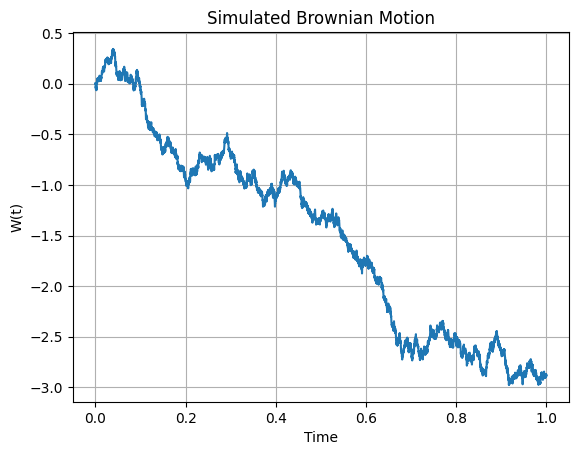

In [ ]:
plt.plot(t,W)
plt.title("Simulated Brownian Motion")
plt.xlabel("Time")
plt.ylabel("W(t)")
plt.grid(True)
plt.show()

Question 2: Let α and σ > 0 be constants, and define the geometric Brownian motion. Simulate 5 paths in a single plot for the above Geometric Brownian Motion.

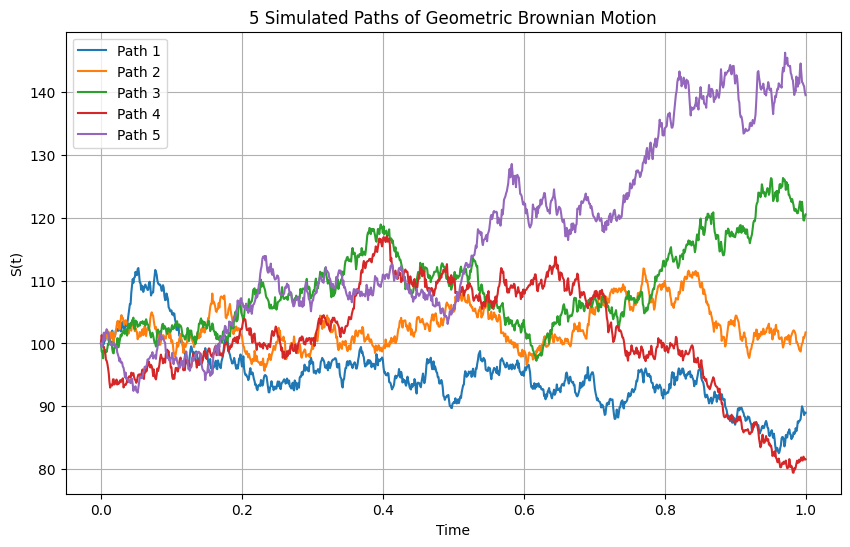

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1.0              # Time horizon
N = 1000             # Number of time steps
dt = T / N           # Time step
t = np.linspace(0, T, N+1)

S0 = 100             # Initial stock price
alpha = 0.1          # Drift
sigma = 0.2          # Volatility
num_paths = 5        # Number of GBM paths

# Simulate paths
paths = np.zeros((num_paths, N+1))
paths[:, 0] = S0

for i in range(num_paths):
    W = np.random.standard_normal(size=N)
    W = np.cumsum(W) * np.sqrt(dt)  # Brownian motion
    X = (alpha - 0.5 * sigma**2) * t[1:] + sigma * W
    paths[i, 1:] = S0 * np.exp(X)

# Plot
plt.figure(figsize=(10, 6))
for i in range(num_paths):
    plt.plot(t, paths[i], lw=1.5, label=f'Path {i+1}')
plt.title('5 Simulated Paths of Geometric Brownian Motion')
plt.xlabel('Time')
plt.ylabel('S(t)')
plt.legend()
plt.grid(True)
plt.show()


**Question 3:**
Show that for standard Brownian motion, E[WsWt] = min(s, t) for s, t ≥ 0.

In [ ]:
from math import exp, pi

In [ ]:
s=.25
t=1
# fixing the time

In [ ]:
def integrand(y, x):
    var1 = s
    var2 = t - s
    coef = 1 / (2 * pi * sqrt(var1 * var2))
    exponent = - (x**2 / (2 * var1) + (y - x)**2 / (2 * var2))
    return x * y * coef * exp(exponent)#the distribution function

# Integrate over a large but finite domain
domain = 10
result, error = dblquad(
    integrand,
    -domain, domain,
    lambda x: -domain, lambda x: domain
)

print("E[W_s W_t] ≈", result)
print("Expected value (min(s, t)) =", min(s, t))

E[W_s W_t] ≈ 0.2500000000000001
Expected value (min(s, t)) = 0.25


In [ ]:
print("E[W_s W_t] ≈", result)
print("Expected value (min(s, t)) =", min(s, t))

E[W_s W_t] ≈ 0.2500000000000001
Expected value (min(s, t)) = 0.25


In [ ]:
# We see that the expectation is almost equal to s which is min(s,t)

**Question 4:**
Let 0 ≤ s < t. Show that Wt −Ws is normally distributed with mean 0 and variance t − s, and that increments over non-overlapping intervals are independent.

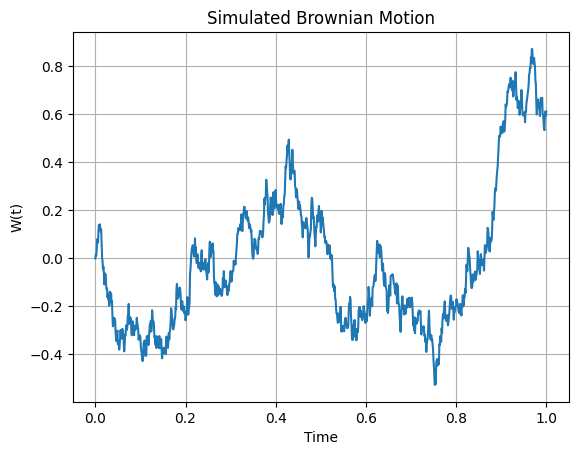

In [ ]:
T = 1.0        # Total time
N = 1000       # Number of time steps
dt = T / N     # Time step size
t = np.linspace(0, T, N+1)

# Simulate standard Brownian motion
np.random.seed(42)
dW = np.random.normal(0, np.sqrt(dt), size=N)
W = np.insert(np.cumsum(dW), 0, 0)  # Insert W0 = 0

# Plot
plt.plot(t, W)
plt.title("Simulated Brownian Motion")
plt.xlabel("Time")
plt.ylabel("W(t)")
plt.grid(True)
plt.show()

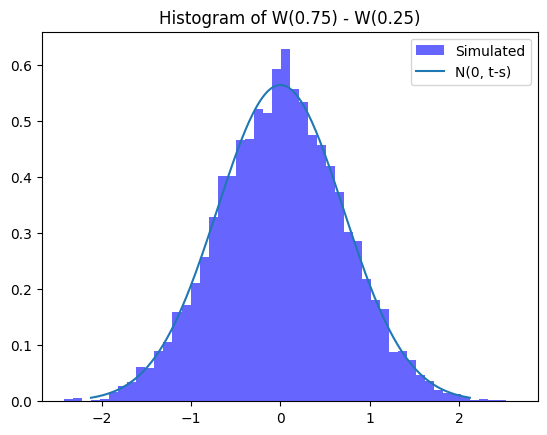

In [ ]:
s = 0.25
t = 0.75
M = 10000  # number of paths

increments = []
for _ in range(M):
    dW = np.random.normal(0, np.sqrt(dt), size=N)
    W = np.insert(np.cumsum(dW), 0, 0)
    idx_s = int(s * N)
    idx_t = int(t * N)
    increments.append(W[idx_t] - W[idx_s])

increments = np.array(increments)

# Plot histogram
plt.hist(increments, bins=50, density=True, alpha=0.6, color='blue', label="Simulated")
mu = 0
sigma = np.sqrt(t - s)
x = np.linspace(-3*sigma, 3*sigma, 200)
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-x**2 / (2 * sigma**2)), label="N(0, t-s)")
plt.title(f"Histogram of W({t}) - W({s})")
plt.legend()
plt.show()

In [ ]:
# The histogram shows that Wt-Ws matches the N(0,t-s) distribution

**Question 5:** Show that for any t ≥ 0, E[Wt|Fs] = Ws for 0 ≤ s ≤ t. Conclude that Brownian motion is a martingale.

Theoretical E[W_t | F_s] ≈ W_s (mean over paths): -0.0100
Empirical mean of W_t: -0.0089


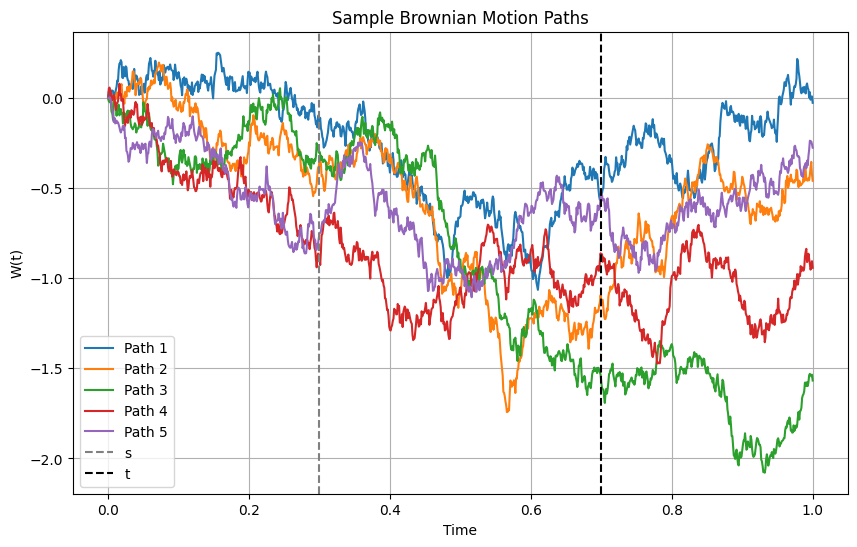

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1.0
N = 1000
dt = T / N
t_grid = np.linspace(0, T, N+1)

s_index = int(0.3 * N)  # s = 0.3
t_index = int(0.7 * N)  # t = 0.7

num_paths = 10000  # large number of simulations

# Simulate Brownian motion paths
W = np.zeros((num_paths, N+1))
for i in range(num_paths):
    dW = np.random.normal(0, np.sqrt(dt), size=N)
    W[i, 1:] = np.cumsum(dW)

# Extract values at s and t
W_s = W[:, s_index]
W_t = W[:, t_index]

# Comparing average of W_t given W_s
# Since increments are independent, E[W_t | W_s] ≈ W_s in expectation
expected_Wt_given_Ws = W_s  # Theoretical
empirical_average_Wt = np.mean(W_t)

# Compute error between E[W_t | F_s] and W_s
mean_Ws = np.mean(W_s)
print(f"Theoretical E[W_t | F_s] ≈ W_s (mean over paths): {mean_Ws:.4f}")
print(f"Empirical mean of W_t: {empirical_average_Wt:.4f}")

# Plot a few sample paths
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(t_grid, W[i], lw=1.5, label=f'Path {i+1}')
plt.axvline(t_grid[s_index], color='gray', linestyle='--', label='s')
plt.axvline(t_grid[t_index], color='black', linestyle='--', label='t')
plt.title('Sample Brownian Motion Paths')
plt.xlabel('Time')
plt.ylabel('W(t)')
plt.legend()
plt.grid(True)
plt.show()
